# Exploration on Ford GoBike System Data
## by Junghoon Suk

<a id = 'start'></a>
#### Table of Contents (workflow)

1. [Preliminary Wrangling](#wrangling)
    - [Assessment](#assess)
    - [Cleaning](#clean)
    - [Feature engineering](#feature)
    
    
2. [Visualization and Exploratory Analysis](#exploratory)
    - [Univariate Exploration](#univariate)
    - [Bivariate Exploration](#bivariate)
    - [Multivariate Exploration](#multivariate)


<a id = 'wrangling'></a>
## `1.` Preliminary Wrangling

> Ford GoBike System Data discovers individual trip information of a bike-sharing system in the Greater Sanfranciso Bay Area. The period discussed for this analysis is June 2020. 

> The data is publicly available on https://www.lyft.com/bikes/bay-wheels/system-data and obtained as part of Udacity's Data Analysis Nano Degree course.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('202006-baywheels-tripdata.csv');

<a id = 'assess'></a>
### `1.1` Assessment

In [3]:
print(df.shape)
df.info() 

(158168, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


In [4]:
# df

In [5]:
print(df.rideable_type.value_counts())
print(df.member_casual.value_counts()) 

electric_bike    109176
docked_bike       48992
Name: rideable_type, dtype: int64
casual    95549
member    62619
Name: member_casual, dtype: int64


In [6]:
print(df.start_station_name.value_counts())
print(df.end_station_name.value_counts()) 

Market St at 10th St                            1555
Hyde St at Post St                              1265
Fell St at Stanyan St                           1225
Powell St BART Station (Market St at 4th St)    1136
Mission Dolores Park                            1042
                                                ... 
Raymond Kimbell Playground                         9
Stanyan St at Geary Blvd                           7
Foothill Blvd at Harrington Ave                    6
7th St at Brannan St                               1
38th Ave at Balboa St                              1
Name: start_station_name, Length: 426, dtype: int64
Market St at 10th St                            1506
Powell St BART Station (Market St at 4th St)    1202
Fell St at Stanyan St                           1182
Mission Dolores Park                            1176
Hyde St at Post St                              1087
                                                ... 
16th Depot Bike Fleet Station                  

In [7]:
print(type(df.start_station_name[1]))
print(type(df.end_station_name[1])) # datatypes are incorrectly float

<class 'float'>
<class 'float'>


#### Checking for any duplication by 'ride_id' feature

In [8]:
print(df.shape[0]) # total number of data
print(df.ride_id.value_counts()) # 158168 ids, equals the total number of data
df.duplicated(subset = 'ride_id').sum()  # no duplication of data by 'ride_id'

158168
5AFDEF931CCBEE2D    1
45AFCAB9CE427AC3    1
567BB1A7D273B24F    1
202BB0F148302AFA    1
52DDEDE0D6DD912A    1
                   ..
F29FA8B8D6E9BE41    1
8C376524AF05B769    1
DC21ED689FDC72F1    1
AC89F17C49C9E398    1
141B7153DAEF0F35    1
Name: ride_id, Length: 158168, dtype: int64


0

---
<a id = 'clean'></a>
### `1.2` Cleaning 

2 major quality issues identified

#### Issue 1. Several missing datas can be observed 
#### Issue 2. Incorrect datatype
- 'started_at' and 'end_at are string
- 'start_station_id', 'end_station_id' are float

---
#### Issue 1. Several Missing data are observed

Three major types of missing data are identified as following:

- issue 1: missing station name and id only 
    - missing start_station_id and start_station_name 
    - missing end_station_id and end_station_name 

- issue 2: completely missing latitutde, longitude 


##### Assumption

- issue 1. may be able to be solved by referring to latitude and longitude data (i.e. start_lat, start_lng, end_lat, end_lng columns) available within the given dataset.    

- issue 2. may indicate docking issues and stolen bikes, which need further investigation over time. 

Ideas from the links below:
- [an article on 'docking issues'](https://abc7news.com/abc7-seven-on-your-side-7-michael-finney/5320540/)
- [an article on a 'stolen bike'](https://abc7news.com/stolen-rented-bike-returned-but-cyclist-still-fined/5707580/)

##### Action on the missing data

For this analysis, we will ignore the missing data as filling up the above missing 'location' data is not main focus, and the number of the complete data is enough to get the findings.


In [1]:
# missing start_station_id and start_station_name only, total 58948 rows
# df[df.start_station_id.isnull() & df.start_lat.notnull()]

In [2]:
# missing end_station_id and end_station_name only, total 60741 rows
# df[df.end_station_id.isnull() & df.end_lat.notnull()]

In [3]:
# completely missing latitutde, longitude, total 276 rows
# df[df.end_station_id.isnull() & df.end_lat.isnull()]

---
#### Issue 2. Incorrect datatype
- 'started_at' and 'end_at' are string
- 'rideable_type', 'member_casual' are object
- 'start_station_id', 'end_station_id' are float


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


##### define

Copy the dataframe df and save it as 'gobike'(to be cleaned)

Change tye type type of the below columns:

- **'started_at' and 'end_at':** use pd.to_datatime to transform into datetime object
- **'rideable_type' and 'member_casual':**: use astype to transform into categorical object
- **'start_station_id' and 'end_station_id':** as they are float with some NaN values, firstly use .fillna( ) method to handle NAN values and .astype(int) to remove decimals. When using .fillna( ), assign -1 as values need to be none-NaN value for .astype(int). Then use again .astype(str) to transform into string, and replace -1 with np.nan.


##### code

In [13]:
gobike = df.copy()

In [14]:
# to datetime object
gobike['started_at'] = pd.to_datetime(gobike['started_at'])
gobike['ended_at'] = pd.to_datetime(gobike['ended_at'])

# to categorical object
gobike['rideable_type'] = gobike['rideable_type'].astype('category')
gobike['member_casual'] = gobike['member_casual'].astype('category')

In [15]:
gobike['start_station_id'] = gobike['start_station_id'].fillna(-1).astype(int).astype(str).replace('-1', np.nan)
gobike['end_station_id'] = gobike['end_station_id'].fillna(-1).astype(int).astype(str).replace('-1', np.nan)

##### Inspired by a stack overflow post: https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

##### test

In [16]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             158168 non-null  object        
 1   rideable_type       158168 non-null  category      
 2   started_at          158168 non-null  datetime64[ns]
 3   ended_at            158168 non-null  datetime64[ns]
 4   start_station_name  99220 non-null   object        
 5   start_station_id    99220 non-null   object        
 6   end_station_name    97151 non-null   object        
 7   end_station_id      97151 non-null   object        
 8   start_lat           158168 non-null  float64       
 9   start_lng           158168 non-null  float64       
 10  end_lat             157892 non-null  float64       
 11  end_lng             157892 non-null  float64       
 12  member_casual       158168 non-null  category      
dtypes: category(2), datetime64[ns

In [17]:
gobike.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
48423,6E5C6AF61DFABEA0,electric_bike,2020-06-27 12:35:34,2020-06-27 12:47:40,Market St at 10th St,58,Market St at Steuart St,16,37.776971,-122.417506,37.794450,-122.394772,casual
141092,95B8A52A996DD594,docked_bike,2020-06-06 12:28:09,2020-06-06 12:47:14,65th St at Hollis St,157,North Berkeley BART Station,250,37.846784,-122.291376,37.873558,-122.283093,member
52788,802639A82C81BB9C,electric_bike,2020-06-30 21:06:48,2020-06-30 21:28:00,Eureka Valley Recreation Center,118,NaN,NaN,37.759203,-122.436862,37.760000,-122.390000,casual
8654,A8063069AAA49A9C,electric_bike,2020-06-20 13:31:23,2020-06-20 13:51:53,Berry St at 4th St,81,Sanchez St at 15th St,95,37.775910,-122.393128,37.766193,-122.431098,casual
149873,7DA32A9257B1F797,docked_bike,2020-06-08 20:31:43,2020-06-08 20:40:04,20th St at Dolores St,381,29th St at Tiffany Ave,147,37.758238,-122.426093,37.744067,-122.421472,member


---
<a id = 'feature'></a>
### `1.3` Feature engineering

Adding some newfeatures using datetime object as following:

- 'duration' feature: difference between 'ended_at' and 'started_at'
- 'date_rented' (also by '-day') and 'time_rented' 

### To create 'trip_time'  feature (unit: minute)

Create a 'trip-time' variable for difference between 'ended_at' and 'start_at', and the dataype of trip_time is timedelta. 

The timedelta variable can be transformed into minutes as unit for trip time.

In [18]:
duration = gobike['ended_at'] - gobike['started_at']
type(duration[0]) 

pandas._libs.tslibs.timedeltas.Timedelta

In [19]:
duration_by_minute = []

for time in duration:
    duration_by_minute.append(time.total_seconds()/60) # transforming seconds to minutes

In [20]:
gobike['duration_min'] = duration_by_minute

The calculated duration by minute has negative values, which are possibly resulted from incorrect inputs. (i.e. 'started_at', 'ended_at' data mixed up). 

Applyting this logic, use numpy.abs() to make all values absolute (>= 0).

In [21]:
gobike['duration_min'].describe()

count    158168.000000
mean         26.949850
std         308.304418
min         -14.050000
25%           7.366667
50%          13.250000
75%          23.350000
max       37233.100000
Name: duration_min, dtype: float64

In [22]:
gobike['duration_min'] = gobike['duration_min'].apply(lambda x: np.abs(x))

Negative values from 'trip_time_minute' feature are removed but there are 42 rows with 0 trip time, which is not correct. Inspect and remove the entry.


In [23]:
gobike['duration_min'].describe() # zero trip time is not ideal 

count    158168.000000
mean         26.950323
std         308.304377
min           0.000000
25%           7.366667
50%          13.250000
75%          23.350000
max       37233.100000
Name: duration_min, dtype: float64

In [5]:
print(gobike[gobike['duration_min'] == 0].shape) # 42 rows with zero trip time
# gobike[gobike['duration_min'] == 0]

NameError: name 'gobike' is not defined

In [25]:
#excluding trip time with 'zero' values
gobike = gobike[gobike['duration_min'] != 0]

### To create 'date_rented', 'day_rented', and 'time_rented' features

'day_rented' feature to study ridership information by dayname (i.e. sunday, monday, ...), and to be cateogory datatype

In [26]:
gobike['date_rented'] = gobike['started_at'].apply(lambda x: x.day)
gobike['day_rented'] = gobike['started_at'].apply(lambda x: x.day_name())
gobike['time_rented'] = gobike['started_at'].apply(lambda x: x.hour)

##### Inspired by a stack overflow post: https://stackoverflow.com/questions/39662149/pandas-extract-date-and-time-from-timestamp

In [27]:
# transforming 'day_rented' into category datatype
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_category = pd.api.types.CategoricalDtype(categories = day_order)

In [28]:
gobike['day_rented'] = gobike['day_rented'].astype(day_category)

In [29]:
# checking for all added features and datatypes
print(gobike.dtypes)

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
duration_min                 float64
date_rented                    int64
day_rented                  category
time_rented                    int64
dtype: object


In [30]:
gobike['date_rented'] = gobike['date_rented'].astype(str)
gobike['time_rented'] = gobike['time_rented'].astype(str)

Keeping features of interest only, and saving the new reorganized dataset as **`'bike_cleaned'`** dataframe.

In [31]:
for i, v in enumerate(gobike.columns):
    print(i, v)

0 ride_id
1 rideable_type
2 started_at
3 ended_at
4 start_station_name
5 start_station_id
6 end_station_name
7 end_station_id
8 start_lat
9 start_lng
10 end_lat
11 end_lng
12 member_casual
13 duration_min
14 date_rented
15 day_rented
16 time_rented


In [32]:
columns_to_drop = gobike.columns[4:12]
bike_cleaned = gobike.drop(columns = columns_to_drop)

In [6]:
# bike_cleaned

In [34]:
bike_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158126 entries, 0 to 158167
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ride_id        158126 non-null  object        
 1   rideable_type  158126 non-null  category      
 2   started_at     158126 non-null  datetime64[ns]
 3   ended_at       158126 non-null  datetime64[ns]
 4   member_casual  158126 non-null  category      
 5   duration_min   158126 non-null  float64       
 6   date_rented    158126 non-null  object        
 7   day_rented     158126 non-null  category      
 8   time_rented    158126 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(1), object(3)
memory usage: 8.9+ MB


In [63]:
bike_cleaned.to_csv('bike_cleaned.csv', index = False)

##### Click [here](#start) to go back to the table of contents.

---
<a id = 'exploratory'></a>
## `2.` Visualization and Exploratory Analaysis 


### What is the structure of your dataset?

> The new dataset created as **`bike_cleaned`** contains 158126 rows and 8 columns. Each row has a unique, non-duplicated identifier, represented as **ride_id** column. It includes 2 datetime, 3 category, 3 objects (string) and 1 float datatype. 

### What is/are the main feature(s) of interest in your dataset?

> **_duration_min_** feature is the key to understand trip time for the given period (June 2020). **_rideable_type_** and **_member_casual_** variables will help comprehend bike uses by product and customer type.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **_date_rented_**, **_day_rented_**, **_time_rented_** will support some simple time series analysis, and refine understandings through multivariate exploration. **_started_at_** and **_ended_at_** variable remain to support finding some anomaly in dataset.

---
<a id = 'univariate'></a>
## `2.1` Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Distribution of the key variable: 'duration_min' 

#### Some outliers are identified and to be cleaned before visualization
The below boxplot summaries some key statistics, and some outliers make it difficult to clearly understand the trip duration. 

- The minimum trip duration show 0.0167 minute which is odd.
- The boxplot shows the range range from 0 near to 600 hours, whereas 75% of the data falls under 23.35 of trip. The maximum trip duration is 37233 minutes (nearly 25 days), which may be possible but is clearly an outlier.

count    158126.000000
mean         26.957482
std         308.345006
min           0.016667
25%           7.366667
50%          13.250000
75%          23.350000
max       37233.100000
Name: duration_min, dtype: float64


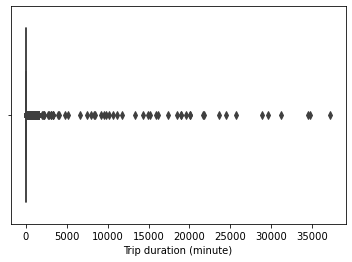

In [36]:
print(bike_cleaned['duration_min'].describe())
sns.boxplot(bike_cleaned['duration_min']);
plt.xlabel('Trip duration (minute)');

#### Inspecting lower bound outeliers

There are cases where trip duration is 0.016667 minute, which does not logically make sense. It may possibly due to the earlier addressed docking issues but is not pretty sure yet without more of internal information.

In [37]:
first_quantile = bike_cleaned[bike_cleaned['duration_min'] < 7.366667]
first_quantile['duration_min'].sort_values()

139238    0.016667
136176    0.016667
147908    0.016667
126608    0.016667
124285    0.016667
            ...   
135553    7.366667
51887     7.366667
101121    7.366667
135317    7.366667
110287    7.366667
Name: duration_min, Length: 39557, dtype: float64

For better understanding, here duration_min less than 1 minute is odd to be investigated. Note that 1 minute is arbitarily selected, and specific parameter may require deeper internal investigation.

There are 4514 entries (2.85% of the total dataset) with less than or equal to 1 minute trip duration. Some of the cases show start_stataion and end_station same within less than 1 minute trip time, which is likely due to some operational issues (i.e. docking problem).

In [7]:
less_than_1min = bike_cleaned[bike_cleaned['duration_min'] <= 1]
print(less_than_1min.shape[0])
print(less_than_1min.shape[0] / bike_cleaned.shape[0])
# less_than_1min 

NameError: name 'bike_cleaned' is not defined

For this analysis, the data with trip duration below 1 min (including) will be dropped.

In [39]:
bike_cleaned = bike_cleaned[bike_cleaned['duration_min'] > 1]
bike_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153612 entries, 0 to 158167
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ride_id        153612 non-null  object        
 1   rideable_type  153612 non-null  category      
 2   started_at     153612 non-null  datetime64[ns]
 3   ended_at       153612 non-null  datetime64[ns]
 4   member_casual  153612 non-null  category      
 5   duration_min   153612 non-null  float64       
 6   date_rented    153612 non-null  object        
 7   day_rented     153612 non-null  category      
 8   time_rented    153612 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(1), object(3)
memory usage: 8.6+ MB


#### Inspecting upper bound outliers

There are 293 multiple-day (more than 24 hours = 1440 minutes) cases. Although it is possible to rent more than one day, here these are arbitarily considered as outliers and to be removed.

**<span style="color:red">Therefore, only single day use case will be discussed for this analysis.</span>**

In [8]:
print(bike_cleaned['duration_min'].sort_values(ascending = False))
# bike_cleaned[bike_cleaned['duration_min'] > 60 * 24] # more than one day use

NameError: name 'bike_cleaned' is not defined

In [41]:
bike_cleaned = bike_cleaned[bike_cleaned['duration_min'] <= 60 * 24]

In [42]:
print(bike_cleaned['duration_min'].describe()) # only day use to be discussed 
bike_cleaned.info()

count    153319.000000
mean         20.890795
std          36.030339
min           1.016667
25%           7.833333
50%          13.616667
75%          23.716667
max        1437.833333
Name: duration_min, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 153319 entries, 0 to 158167
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ride_id        153319 non-null  object        
 1   rideable_type  153319 non-null  category      
 2   started_at     153319 non-null  datetime64[ns]
 3   ended_at       153319 non-null  datetime64[ns]
 4   member_casual  153319 non-null  category      
 5   duration_min   153319 non-null  float64       
 6   date_rented    153319 non-null  object        
 7   day_rented     153319 non-null  category      
 8   time_rented    153319 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(1), object(3)
memory usage: 8.6+ MB


--- 
### Distribution of Trip Duration (min)

Only single day bike use is included.

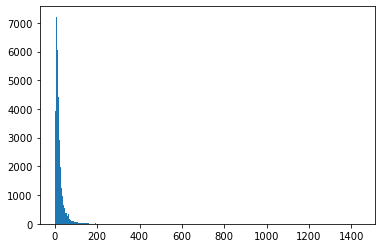

In [43]:
bin_edges = np.arange(0, bike_cleaned['duration_min'].max() + 1, 1)
plt.hist(bike_cleaned['duration_min'], bins = bin_edges);

However, as seen above the distribution of trip duration (min) is extremely skewed to right even after removing outliers.
Therefore, **log scale** is applied as below. 

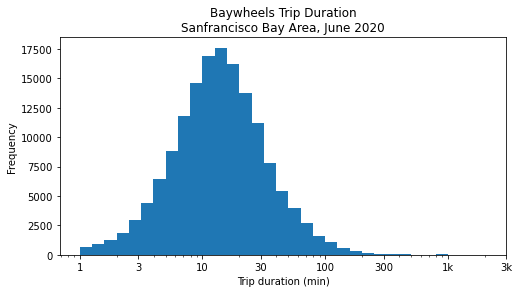

In [44]:
log_data = np.log10(bike_cleaned['duration_min'])
bin_edges = 10 ** np.arange(0, log_data.max() + 0.1, 0.1)

plt.figure(figsize = [8,4])

plt.hist(bike_cleaned['duration_min'], bins = bin_edges);
plt.xscale('log');
tick_prop = [1, 3, 10, 30, 100, 300, 1000, 3e3]
tick_label = ['1', '3', '10', '30', '100', '300', '1k', '3k']
plt.xticks(tick_prop, tick_label);

plt.title('Baywheels Trip Duration\nSanfrancisco Bay Area, June 2020')
plt.xlabel('Trip duration (min)')
plt.ylabel('Frequency');

In [45]:
bike_cleaned['duration_min'].describe()

count    153319.000000
mean         20.890795
std          36.030339
min           1.016667
25%           7.833333
50%          13.616667
75%          23.716667
max        1437.833333
Name: duration_min, dtype: float64

The above log scaled histgram shows unimodal distribution, slightly skewed to right. 

For a single trip, the median trip duration is close to 14 minutes, with over 75% of the users rent bike for 24 minutes.

### Exploring into bike rentals by date, days and time

Firstly rearrange the order of date for 'date_rented' and 'time_rented' column and draw a bar chart to see number of rentals per date in June 2020.

In [46]:
date_order = [str(i) for i in np.arange(1, 31, 1)]
date_category = pd.api.types.CategoricalDtype(categories = date_order)
bike_cleaned['date_rented'] = bike_cleaned['date_rented'].astype(date_category)

In [47]:
time_order = [str(i) for i in np.arange(0, 25, 1)]
time_category = pd.api.types.CategoricalDtype(categories = time_order)
bike_cleaned['time_rented'] = bike_cleaned['time_rented'].astype(time_category)

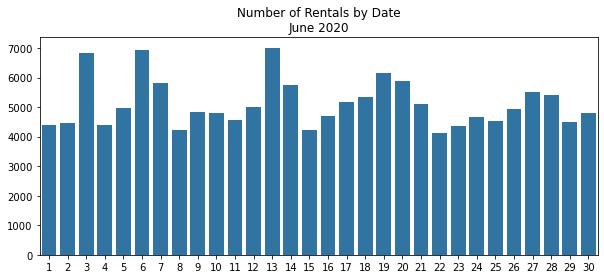

In [48]:
base_color = sns.color_palette()[0]

plt.figure(figsize = [10, 4])

sns.countplot(bike_cleaned['date_rented'], color = base_color);
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Rentals by Date\nJune 2020');

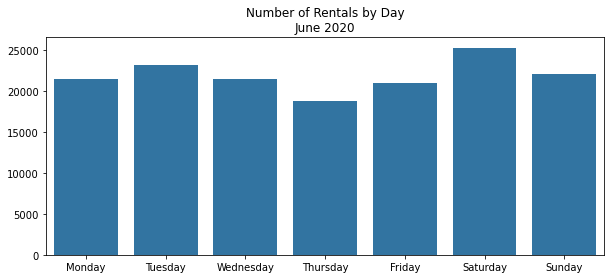

In [49]:
base_color = sns.color_palette()[0]

plt.figure(figsize = [10, 4])

sns.countplot(bike_cleaned['day_rented'], color = base_color);
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Rentals by Day\nJune 2020');

Axis labels are exlcuded as the title and graph is straightforward.

The number of rentals in June 2018 is quite consistent above 4000 / day, with the hightest ridership recorded on 3, 6, 13 June, reaching nearly 7000 / day. 

Ridership is the highest on Saturdays, and the lowest on Thursdays.

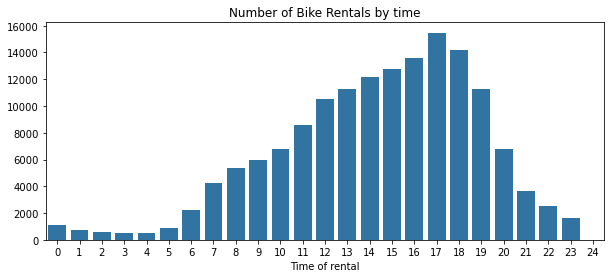

In [50]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [10, 4])

sns.countplot(bike_cleaned['time_rented'], color = base_color);
plt.xlabel('Time of rental')
plt.ylabel('')
plt.title('Number of Bike Rentals by time');

During the day, the ridership shows a constant increase from 6am till it peaks at 17-18pm. Still there is demand for bike rentals from 18 - 21pm, after which becomes the least throughout the night time until 6am.  

### Exploring supporting variables 'rideable_type' and 'member_casual'

These two features are key to understand performance by product (rideable_type) and customer (member or not) later with bivariate exploaration.

In [51]:
n_total = bike_cleaned.shape[0]
btype_counts = bike_cleaned['rideable_type'].value_counts()
btype_order = btype_counts.index

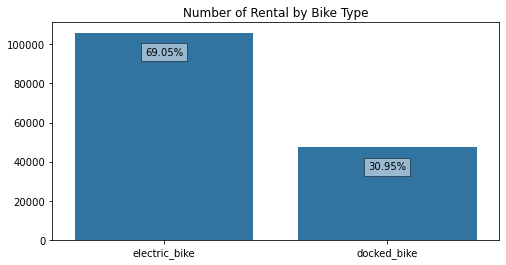

In [64]:
plt.figure(figsize = [8, 4])
base_color = sns.color_palette()[0]

sns.countplot(bike_cleaned['rideable_type'], color = base_color, order = btype_order); 
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Rental by Bike Type');

for i in range(btype_counts.shape[0]):
    count = btype_counts.values[i]
    pct_string = '{:0.2f}%'.format(100 * count / n_total)
    plt.text(i, count - 10000, pct_string, va = 'center', ha = 'center',
             bbox = dict(facecolor='white', alpha=0.5)) 
    

Around 69% of the rentals were electric bikes as opposed to 31% of docked bikes.



In [53]:
n_total = bike_cleaned.shape[0]
ctype_counts = bike_cleaned['member_casual'].value_counts()
ctype_order = ctype_counts.index

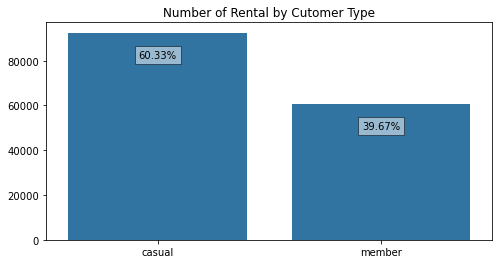

In [54]:
plt.figure(figsize = [8, 4])
base_color = sns.color_palette()[0]

sns.countplot(bike_cleaned['member_casual'], color = base_color, order = ctype_order); 
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Rental by Cutomer Type');

for i in range(ctype_counts.shape[0]):
    count = ctype_counts.values[i]
    pct_string = '{:0.2f}%'.format(100 * count / n_total)
    plt.text(i, count - 10000, pct_string, va = 'center', ha = 'center', 
             bbox = dict(facecolor='white', alpha=0.5))   

When it comes to customer type, members account for 40% of users and the rest 60% are casual users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **`'Duration_min'`** variable is created by difference between the existing 'started_at' and 'ended_at' features indicating trip time, and is the key variable of interest. The distribution is extremely skewed to right even after removing outliers so log scale was used to improve representation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Roughly 2.8% of dataset showed trip duration less than 1 minute, which is odd. Although exact parameters are unknowned, all the entries with less than 1minute trip duration was therefore removed. In addition, 293 dataset had trip duration more than 1 day, which is likely but treated as outliers to be excluded. In conclusion, only single day trip more than 1 minute of use case will be discussed for this analysis.

---
<a id = 'bivariate'></a>
## `2.2` Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Exploring relationship between bike type and trip duration

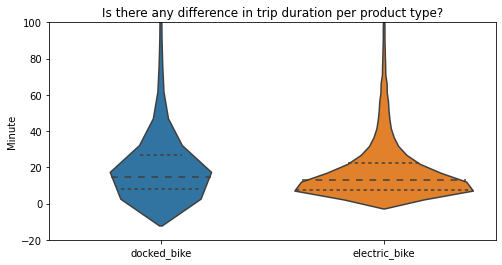

In [55]:
plt.figure(figsize = [8, 4])

sns.violinplot(data = bike_cleaned, x = 'rideable_type', y = 'duration_min', 
               inner = 'quartile');

plt.ylim([-20, 100]);
plt.xlabel('')
plt.ylabel('')
plt.title('Is there any difference in trip duration per product type?');
plt.ylabel('Minute');

More than 75% reported the trip duration below 40 minutes for both docked bike and electric bike, with the trip duration for lowest 25% is roughly bleow 10 minutes. There is no much of noticeable difference bewteen the two bike types in terms of trip duration.

### Exploring relationship between customer type and trip duration

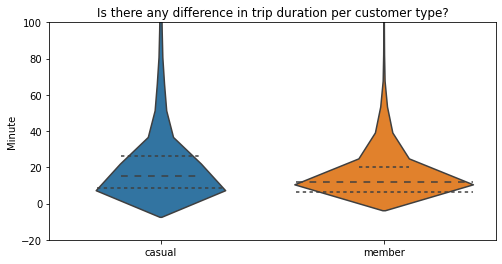

In [56]:
plt.figure(figsize = [8, 4])

sns.violinplot(data = bike_cleaned, x = 'member_casual', y = 'duration_min', 
               inner = 'quartile');

plt.ylim([-20, 100]);
plt.xlabel('')
plt.ylabel('')
plt.title('Is there any difference in trip duration per customer type?');
plt.ylabel('Minute');

The median (50%) trip duration is below 20 minues for both casual user and member. 

There is no noticeable difference between casual and member in terms of trip duration either. 

Third quantitle (75% of the observation) lie higher in casual than member, suggesting casual user may ride longer than member.

### Exploring trip duration on weekends vs weekdays

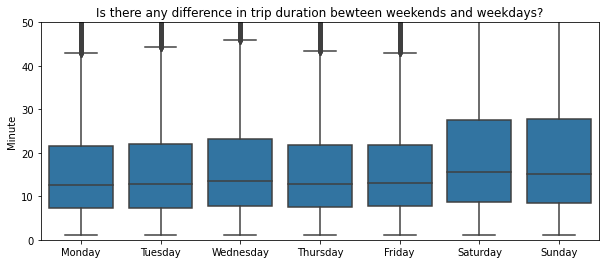

In [57]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [10, 4])

sns.boxplot(data = bike_cleaned, x = 'day_rented', y = 'duration_min', color = base_color)

plt.ylim([0, 50])
plt.xlabel('')
plt.ylabel('')
plt.title('Is there any difference in trip duration bewteen weekends and weekdays?');
plt.ylabel('Minute');

It is weekends that trip duration slightly increases compared to weekdays.

### Exploring relationship between bike type and customer type

In [58]:
categorical_variables = bike_cleaned.groupby(['member_casual', 'rideable_type']).size()
categorical_variables = categorical_variables.reset_index(name = 'count')
categorical_variables = categorical_variables.pivot(index = 'member_casual', columns = 'rideable_type', values = 'count')

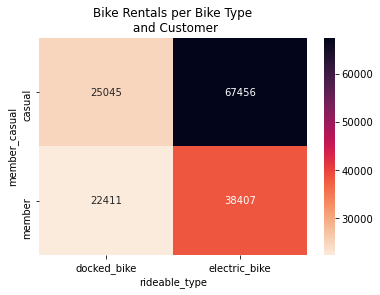

In [71]:
plt.figure(figsize = [6, 4])

sns.heatmap(categorical_variables, annot = True, fmt = 'd', cmap = 'rocket_r');
plt.title('Bike Rentals per Bike Type\n and Customer');

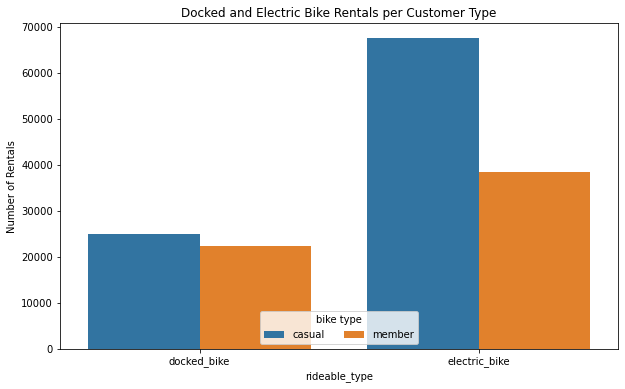

In [75]:
plt.figure(figsize = [10, 6])

sns.countplot(data = bike_cleaned, x = 'rideable_type', hue = 'member_casual');
plt.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'bike type');
plt.title('Docked and Electric Bike Rentals per Customer Type')
plt.ylabel('Number of Rentals');

In a relationship bewteen bike and customer type, the most bike rentals was made for electric bike by casual users. Casual users are more likely to ride electric bikes than members. For docked bikes, there is no big difference in use between casual and members.

Both casual users and members rode more electric bikes than docked bikes. The question now is if customers ride longer trip duration with electric bikes, which is to be explored with multivariate charts. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is not obvious to tell the difference bewteen docked bike and electric bike in terms of trip duration. Plus, trip duration does not vary between member and casual users. On the other hand, there was a slight difference in trip duration between weekends and weekday; where users on weekends are a bit more likely to rent bikes longer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship bewteen bike and custome type was explored. Casual users are more likely to ride electric bikes than members, whilst there is no difference in use between the two customer type for docked bikes. Electric bikes are rented more than docked bikes. Whether users on electric bikes rent longer or not will be discussed in the following multivariate exploration.

---
<a id = 'multivariate'></a>
## `2.3` Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### How long do electric bike users rent?

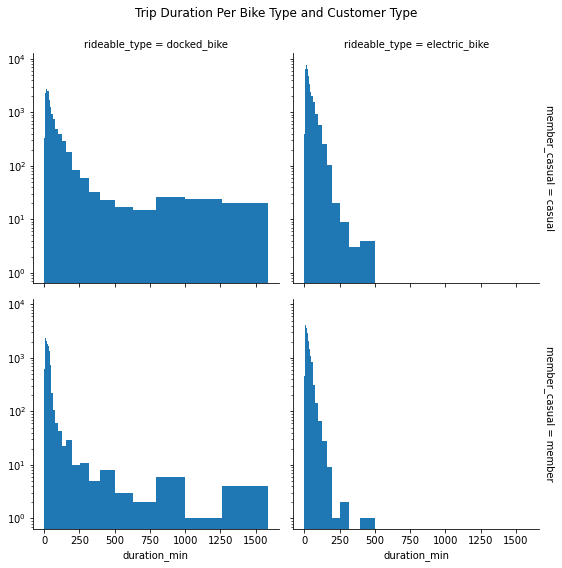

In [60]:
log_data = np.log10(bike_cleaned['duration_min'])
bins_edges = 10 ** np.arange(0, log_data.max() + 0.1, 0.1)

g = sns.FacetGrid(data = bike_cleaned, col = 'rideable_type', row = 'member_casual',
                  height = 4, aspect = 1, margin_titles = True)

g.map(plt.hist, 'duration_min', bins = bins_edges).set(yscale = 'log');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration Per Bike Type and Customer Type ', fontsize=12);

From the earlier finding, we know that users rode more electric bikes than docked bikes. 

However, trip duration seems less for electric bikes. There is no case that eletric bikes are rented longer than 500 minutes (over 8 hours), whereas docked bikes are rented longer than 500 minutes in many cases.

### How long is trip duration per bike or user type, across days?

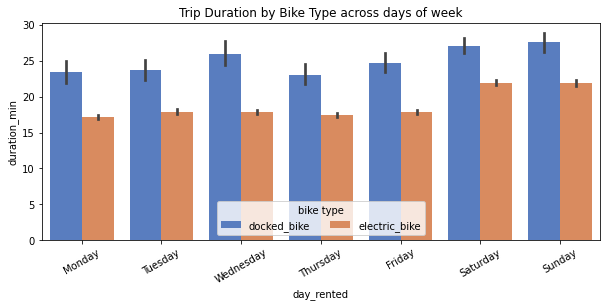

In [67]:
plt.figure(figsize = [10, 4])

sns.barplot(data = bike_cleaned, x = 'day_rented', y = 'duration_min', 
            hue = 'rideable_type', palette = 'muted')
plt.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'bike type')
plt.title('Trip Duration by Bike Type across days of week')
plt.xticks(rotation = 30);

It is apparent that docked bike has longer trip duration than electric bikes, and the trend is consistent across days. Both docked and electric bike have slightly longer duration on weekends than weekdays.

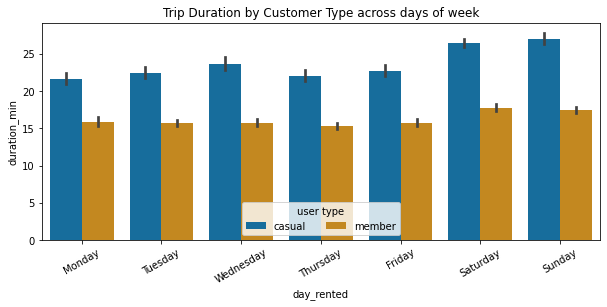

In [66]:
plt.figure(figsize = [10, 4])

sns.barplot(data = bike_cleaned, x = 'day_rented', y = 'duration_min', 
              hue = 'member_casual', palette = 'colorblind')
plt.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'user type')
plt.title('Trip Duration by Customer Type across days of week')
plt.xticks(rotation = 30);

Both casual and member are litekly to rent bikes longer on weekends than on weekdays, whereas the degree of difference is more noticeable for casual users. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When duration time is considered, users on electric bikes have shorter trip time than those on docked bikes. This relationship was more apparent on the cluster bar chart across days. 

### Were there any interesting or surprising interactions between features?

> It draws attention that electric bikes have shorter duration when users are more likely to rent the kind. It will also be interesting to find the reason that the trip duration of electric bikes always fall under 500 minutes (approximately 8 hour level).

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

##### Click [here](#start) to go back to the table of contents.